# Import libraries

In [41]:
import pandas as pd
import numpy as np
import tflearn
from tflearn.data_utils import load_csv
from tflearn.datasets import titanic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Download des Titanic-Datensatzes
titanic.download_dataset('titanic_dataset.csv')

# CSV-Datei laden, angeben, dass die erste Spalte Beschriftungen darstellt
data, labels = load_csv('titanic_dataset.csv', target_column=0,
                        categorical_labels=True, n_classes=12, has_header=True)

df = pd.DataFrame(data)

# Führen Sie einen Test/Train-Split durch
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

In [28]:
df

,0,1,2,3,4,5,6,7
0,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500
2,1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500
...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542
1305,3,"Zabour, Miss. Thamine",female,0,1,0,2665,14.4542
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250
1307,3,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250


# Transformationen
- Spalte 1 und 6 streichen 
- Spalte zwei als Kat-Codes umcodieren
- Typ Float32 für alle Spalten

In [29]:
df = df.drop(1, axis=1)
df = df.drop(6, axis=1)
df.head()

,0,2,3,4,5,7
0,1,female,29,0,0,211.3375
1,1,male,0.9167,1,2,151.5500
2,1,female,2,1,2,151.5500
3,1,male,30,1,2,151.5500
4,1,female,25,1,2,151.5500


In [39]:
def categorical_encoder(data, category_variables):
    label = LabelEncoder()
    for category in category_variables:
        label.fit(data[category].drop_duplicates())
        data[category] = label.transform(data[category])
    return df

df.head()


,0,2,3,4,5,7
0,1.0,0.0,29.0000,0.0,0.0,211.337494
1,1.0,1.0,0.9167,1.0,2.0,151.550003
2,1.0,0.0,2.0000,1.0,2.0,151.550003
3,1.0,1.0,30.0000,1.0,2.0,151.550003
4,1.0,0.0,25.0000,1.0,2.0,151.550003


In [40]:
df = categorical_encoder(df, [2])
df = df.astype({
    0: "float32",
    2: "float32",
    3: "float32",
    4: "float32",
    5: "float32",
    7: "float32",
})
df.dtypes

0    float32
2    float32
3    float32
4    float32
5    float32
7    float32
dtype: object

In [19]:
X_train.heat()  # hier muss man was korrigieren

AttributeError: 'DataFrame' object has no attribute 'heat'

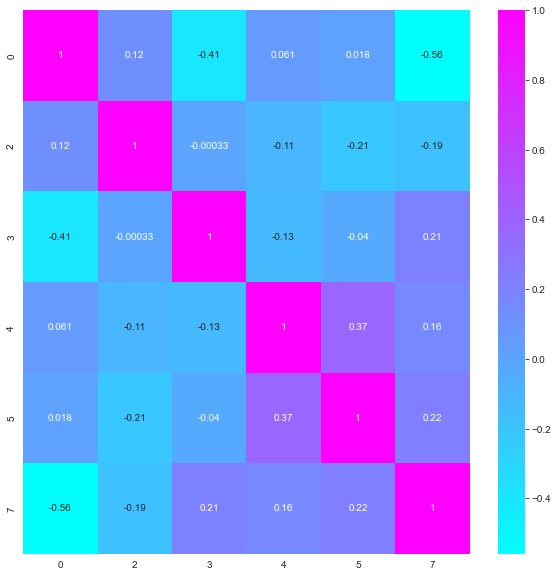

In [42]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

In [4]:
X_train = preprocess(X_train)
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,0.0,1.0,17.0,0.0,0.0,435.0,7.895800
1,0.0,1.0,36.0,0.0,0.0,628.0,10.500000
2,1.0,0.0,18.0,0.0,2.0,1.0,79.650002
3,0.0,1.0,47.0,1.0,0.0,699.0,227.524994
4,0.0,1.0,0.0,0.0,0.0,50.0,42.400002


In [5]:
X_train.shape

(1047, 7)

In [6]:
y_train.shape

(1047, 12)

# Aufbau des neuronalen Netzes

In [9]:
import tensorflow as tf

# Bauen neural network
net = tflearn.input_data(shape=[None, 7])
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connect(net, 32)hier muss man was korrigieren
net = tflearn.fully_connected(net, hier muss man was schreiben, activation='softmax')
net = tflearn.regression(netto)hier muss man was korrigieren

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Train it

In [10]:
# Definieren das model
model = tflearn.DNN(net)
# Start training (apply gradient descent algorithm)
model.fit(X_train, y_train, n_epoch=hier muss man was schreiben, batch_size=32, show_metric=True)
# Mit cross validation
model2 = tflearn.DNN(net)
model2.fit(X_train, y_train, n_epoch=20, batch_size=32, show_metric=True, validation_set=0.1) 

Training Step: 499  | time: 0.060s
| Adam | epoch: 020 | loss: 0.00000 - acc: 0.0000 -- iter: 768/789
Training Step: 500  | time: 1.081s
| Adam | epoch: 020 | loss: 0.00000 - acc: 0.0000 | val_loss: 0.54417 - val_acc: 0.7386 -- iter: 789/789
--


# Bewerten Sie es

In [11]:
X_test = preprocess(X_test)
metric_train = model.evalute(X_train, y_train)hier muss man was korrigieren
metric_test = model.evaluate(X_test, y_test)
metric_train_1 = model2.evaluate(X_train, y_train)
metric_test_1 = model2.evaluate(X_test, y_test)

In [12]:
print('Model 1 Accuracy on train set: %.9f' % metric_train[0])
print("Model 1 Accuracy on test set: %.9f" % metric_test[0])
print('Model 2 Accuracy on train set: %.9f' % metric_train_1[0])
print("Model 2 Accuracy on test set: %.9f" % metric_test_1[0])

Model 1 Accuracy on train set: 0.741163054
Model 1 Accuracy on test set: 0.694444444
Model 2 Accuracy on train set: 0.724059292
Model 2 Accuracy on test set: 0.666666667


# Erstellen wir einige gefälschte Daten für Leo und Cate

In [13]:
# Let's create some data for DiCaprio and Winslet
dicaprio = [3, 'Jack Dawson', 'male', 19, 0, 0, 'N/A', 5.0000]
winslet = [1, 'Rose DeWitt Bukater', 'female', 17, 1, 2, 'N/A', 100.0000]
# Preprocess data
dicaprio, winslet = preproces(pd.DataFrame([dicaprio, winslet]))hier muss man was korrigieren
# Überlebenschancen vorhersagen 
pred = model.prediction([dicaprio, winslet])hier muss man was korrigieren
print("DiCaprio Surviving Rate:", pred[0][1])
print("Winslet Surviving Rate:", pred[1][1])

DiCaprio Surviving Rate: 0.14603336
Winslet Surviving Rate: 0.7151657
